By Amy Weng

Code adapted from https://towardsdatascience.com/word2vec-explained-49c52b4ccb71#:~:text=CBOW%20%28continuous%20bag%20of%20words%29%20and%20the%20skip-gram,and%20try%20to%20predict%20the%20missing%20one.%20Resources. 

https://towardsdatascience.com/word-embeddings-and-embedding-projector-of-tensorflow-c946b98c9b3f

Word2Vec Continuous Bag of Words Model Word Embedding and Visualization

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from stop_words import remove_stopwords

from gensim.scripts import word2vec2tensor
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA
plt.style.use('ggplot')
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector

In [47]:
# Remove stopwords/preprocess
stop_words = stopwords.words('english')
stop_words.extend(['thus', 'thereof', 'thence', 'thee', 'therein', 
                    'wherein', 'whereby', 'whereas', 'also', 'us', 'upon', 
                    'would', 'within', 'indeed', 'become', 'viz', 'per', 'anno', 
                    'whilst', 'thoe', 'ome', 'uch', 'said', 'shall', 'hath',
                    'may','made','much','one','mr','how','like','full','one',
                    'two','three','four','five','day','say','thou','make','men','man',
                    'done','do','have','well','know','heard','hear',
                    'saying','come','never','time','think','came','till','might',
                    'could','begin','began','took','went','last','matter','seeing',
                    'go','many','few','see','take','found','without','little','long',
                    'put','brought','bring','another','th','aforesaid','old',
                    'tell','em','yet','cae','mot','doe','aloe','every','elf',
                    'himelf','thy','de','ch','com','says','part','through','let',
                    'must','sir','tho','away','part','unto','printed','doth',
                    'iq','esq','firt','et','among','everal','ver','called','lt',
                    'every','even','becaue','ibid','de','lib','ch','com','often',
                    'againt','second','dr','though','goes','non','equire',
                    'page','told','hold','sr','ditto','elf','therefore','de',
                    'ps','six','ent','mr','inits','ee','ay','mut','almost',
                    'concerning','ey','vol'])
        
def remove_stopwords(data):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in data]

In [92]:
def embed(df,word,title):
    data = df.text.values.tolist()
   
    # preprocess and remove stopwords 
    data = remove_stopwords(data)
    
    model = w2v(data,min_count=3,sg = 1,window=7)     
    model.wv.save_word2vec_format(title+'.model')
    print(model.wv.most_similar(word))
    emb_df = (
        pd.DataFrame(
            [model.wv.get_vector(str(n)) for n in model.wv.key_to_index],
            index = model.wv.key_to_index
        )
    )
    return(emb_df)

In [99]:
myCSV = '/home/rapiduser/Materials/topic model/publica/eic_monopoly.csv'

readFile = pd.read_csv(myCSV)

# read text information into a dataframe
embeddings = embed(readFile,'corruption','publica_eic_monopoly')

[('durableness', 0.956919252872467), ('ductileness', 0.9561815857887268), ('purer', 0.9508287310600281), ('civiliz', 0.9500253796577454), ('worthless', 0.9497019648551941), ('prognostics', 0.949314534664154), ('repairing', 0.9488340020179749), ('rising', 0.9477294087409973), ('ardent', 0.9468207359313965), ('specifically', 0.9460503458976746)]


In [ ]:
from gensim.scripts import word2vec2tensor
tensor_dir='/home/rapiduser/Materials/tensor'
word2vec2tensor.word2vec2tensor(
    '/home/rapiduser/Materials/embeddings/publica_eic_monopoly.model',
    tensor_dir+'/publica_eic_monopoly',
    binary=False)
# def project(title):
#     config = projector.ProjectorConfig()
#     embedding = config.embeddings.add()
#     embedding.tensor_name = tensor_dir+'/'+title+'_tensor.tsv'
#     embedding.metadata_path = tensor_dir+'/'+title+'_metadata.tsv'
#     projector.visualize_embeddings(tensor_dir, config)

<Figure size 432x288 with 0 Axes>

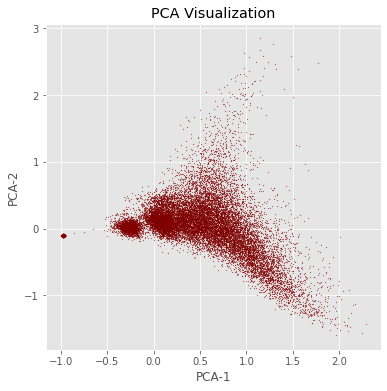

In [70]:
def visualizePCA(emb_df):
    pca = PCA(n_components=2, random_state=7)
    pca_mdl = pca.fit_transform(emb_df)

    emb_df_PCA = (
        pd.DataFrame(
            pca_mdl,
            columns=['x','y'],
            index = emb_df.index
        )
    )

    plt.clf()
    plt.figure(figsize=(6,6))

    plt.scatter(
        x = emb_df_PCA['x'],
        y = emb_df_PCA['y'],
        s = 0.5,
        color = 'maroon',
        alpha = 0.5
    )

    plt.xlabel('PCA-1')
    plt.ylabel('PCA-2')
    plt.title('PCA Visualization')
    plt.plot()